# Fundamentals of Convolutional Neural Networks 2 - Pooling and Dense Layers

Welcome to the second notebook on Convolutional Neural Networks. In this notebook, we will explore Pooling and Dense Layers.

## Pooling Layers

We previously saw that we can increase the downsampling capability of our convolutional layer by increasing the stride parameter. Another way to add downsampling to our convolutional neural network, which is often used is the pooling operation. The pooling operation is quite easy to grasp since we are familiar with the concept of convolution now. In pooling layers, every neuron is connected to only a unique, limited number of the neurons in the previous layer (so these layers also have a receptive field just like convolutional layers). The neurons in the pooling layer have similar parameters to convolutional layers as well. However, neurons in pooling layers unlike the convolutional layers, use a hardcoded aggregation function such as max or min. Let's see an illustration of this operation.

<img src="imgs/gif4.gif" width="40%">

<a href="https://pub.towardsai.net/introduction-to-pooling-layers-in-cnn-dafe61eabe34"> Source </a>

The most commonly used two pooling techniques are illustrated above. Similar to the convolutional layers, we again slide a kernel over unique patches of the input feature map (observe that stride is set to 2x2, which indicates we use a kernel with a step size of 2 in both height and width axis), but this time instead of using a learnable kernel to transform local patches, we use a hardcoded operation either by calculating the max value of each patch or the average. Moreover, pooling layers generally work on each color channel separately and they only reduce the spatial dimensionality of the data.

Let's use both of these techniques starting with `keras.layers.MaxPool2D()`. 

Firstly, let's load Cifar10 dataset again.

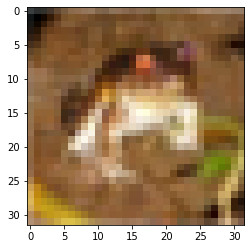

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
sample=x_train[:2,:,:,:]
plt.imshow(sample[0,:,:,:])

Just as `keras.layers.Conv2D()` we can define the size, padding type and stride parameters of `tf.keras.layers.MaxPool2D()` but first let's start off with the default setting.

In [ ]:
maxpool2D = tf.keras.layers.MaxPool2D()

In [ ]:
output = maxpool2D(sample)

In [ ]:
output.shape

TensorShape([2, 16, 16, 3])

(-0.5, 15.5, 15.5, -0.5)

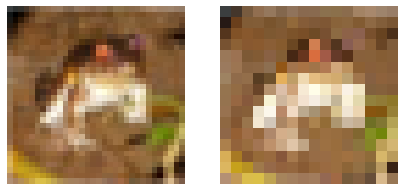

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,7))
ax1.imshow(sample[0,:,:,:])
ax1.axis("off")
ax2.imshow(output[0,:,:,:])
ax2.axis("off")

The default parameter choices of `tf.keras.layers.MaxPool2D()` is 2x2 kernel with a stride of two and valid padding. This default parameters reduced the size of our image two times in width and height. We can tune these parameters just as we tuned the parameters of `tf.keras.layers.Conv2D()`.

In [ ]:
maxpool2D = tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid") 

To see all the parameters that you can tune, check out the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D).

Let's move on to `tf.keras.layers.AveragePooling2D()`.

In [ ]:
avgpool2D = tf.keras.layers.AveragePooling2D()

In [ ]:
output = avgpool2D(sample/255.0) # the data type should not be uint8


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [ ]:
output.shape

TensorShape([2, 16, 16, 3])

(-0.5, 15.5, 15.5, -0.5)

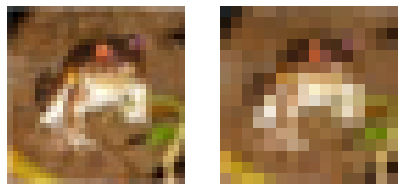

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,7))
ax1.imshow(sample[0,:,:,:])
ax1.axis("off")
ax2.imshow(output[0,:,:,:])
ax2.axis("off")

The default parameter choices of `tf.keras.layers.AveragePooling2D()` is the same as `tf.keras.layers.MaxPool2D()` and we can tune it in the same way. Furthermore, MaxPooling tends to work better in practice, as its ability to preserve the strongest features and omit the weak ones can filter the noise and provide a cleaner signal to successive layers. 

Documentation for AveragePooling2D: [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D).

### The need of Downsampling and Pooling Layers


Why do we need down-sampling or more specifically pooling layers?

1. **To distill the high amount of information to reduce computational cost:** An image can be consisting of millions of pixels, which means we need to calculate millions of linear/non-linear operations in neurons. By using pooling layers, we can downsample the input and reduce the computational costs.


2. **Increasing receptive field of successive CNN filters:** As you can see in our example above, after the pooling layer the input halved into 16x16, by keeping the same kernel size in our successive CNN layers we will let the layers filter information from increasingly larger receptive fields.


3. **Invariance and Non-linearity in Pooling Layers:** While performing the max-pooling operation to a patch, it does not matter where exactly the highest value is, because the only thing that the aggregation function will care about is where the highest value is in that patch. Therefore, pooling layers also introduce invariance to small translations. 

<img src="imgs/image7.png" width="60%">

<a href="https://www.deeplearningbook.org/contents/convnets.html"> Source </a>

Average pooling also adds a similar invariance (generally less than max-pooling). Adding more invariance can be beneficial in case of some classification problem, for instance when we are trying to classify by only caring whether a feature is present rather than exactly where it is (for instance, let's say we are doing a flower classification to recognize different types of flower). In such a case, pooling layers can help to blur the location information to some extent. However, making the model completely location-agnostic would require more data (data augmentation can be beneficial to force the model to learn location invariance). On the other hand, this invariance may not be always beneficial. For instance, when we are dealing with semantic segmentation, the relative location of instances would be an important feature to consider since we need to classify the pixels according to the position of the target object (if the target object is translated to right or left then the predicted object should be translated). In this case, we need equivariance. You can find more about equivariance in the further reading section. On the other hand, one other advantage of the max-pooling operation is that it also introduces some non-linearity whereas average pooling does not have that effect.

Lastly, there is yet one pooling layer type to learn, namely global average pooling, which works similarly to average pooling but instead of taking averages on patches, it takes averages of each feature map. Then we can use the softmax layer or fully connected layers without flattening the feature maps. We will soon learn about this layer type as well.

For learning more about invariance and equivariance, I recommend the following sources:
1. [Deep Learning Equivariance and Invariance](https://www.doc.ic.ac.uk/~bkainz/teaching/DL/notes/equivariance.pdf)
2. [Pooling in Convolutional Networks](https://cedar.buffalo.edu/~srihari/CSE676/9.3%20Pooling.pdf)
3. [What is the benefit of using average pooling rather than max pooling?](https://www.quora.com/What-is-the-benefit-of-using-average-pooling-rather-than-max-pooling)
4. [Why is max pooling necessary in convolutional neural networks?](https://stats.stackexchange.com/questions/288261/why-is-max-pooling-necessary-in-convolutional-neural-networks)
5. [How exactly does max pooling create translation invariance?](https://www.quora.com/How-exactly-does-max-pooling-create-translation-invariance)
6. [Max Pooling in Convolutional Neural Network and Its Features](https://analyticsindiamag.com/max-pooling-in-convolutional-neural-network-and-its-features/)
7. [Comprehensive Guide to Different Pooling Layers in Deep Learning](https://analyticsindiamag.com/comprehensive-guide-to-different-pooling-layers-in-deep-learning/)
8. [Introduction To Pooling Layers In CNN](https://pub.towardsai.net/introduction-to-pooling-layers-in-cnn-dafe61eabe34)

## Dense Layers

In the first notebook, we learnt about the convolutional layers that filter the input and create feature maps. Then we talked about pooling layers that downsample the input to reduce computational cost in addition to its other advantages. In a typical convolutional neural network architecture, convolutional layers are followed by pooling layers and these layers are stacked together one after another several times to extract features effectively. The question is then, how can we use these extracted features in classification? Therein lies the need of using our old friends, Dense layers (at least for traditional ConvNets, later we will also see Fully Convolutional Neural Networks that do not include Dense Layers). 


<img src="imgs/web1.webp" width="70%">

<a href="https://www.dominodatalab.com/blog/gpu-accelerated-convolutional-neural-networks-with-pytorch"> Source </a>

In this sense, we can say that the convolutional neural network has two main parts: the first part is the feature extractor consisting of convolutional layers and pooling layers, and the second part is the decision-making part which handles the classification. Now let's explore the components of this classification part starting with flatten layer.

<img src="imgs/image8.png" width="40%">

We previously used `tf.keras.layers.Flatten()` in my Deep Learning Fundamental notebooks and you can see the illustration above. As you may recall, it reshapes a tensor to have the same shape as the number of elements in the tensor, in other words, it converts a grid-shape structure (such as images or pooled feature maps in our case) into a 1-D vector since dense layers expect it that way. 

<img src="imgs/image9.png" width="30%">

<a href=""> Source </a>

After the flattening, we pass the 1-D vector to the dense layers as represented in the above illustration. In the last layer, we again use the dense layers to give the final result. For a binary classification problem, we generally use one neuron with a sigmoid activation function which will output either 0 or 1 (assigning values lower than 0.5 to the negative class and the higher to the positive class). For multi-class classification problems, we need to use as many neurons as the number of classes where each neuron uses the softmax activation function to output probabilities. Then we can use the argmax operator to assign an instance to a class where the output is maximum given the instance. This case is illustrated in the first schematic of this section. We have three classes Car, Computer, and Dog, after we feed the instance to the neural network the first output neuron gives the highest value (0.82) then we can assign the instance to the Computer class using the argmax operator.

### Differences between MLPs and CNNs

**1. Computational costs:** The Convolutional Neural Networks extensively reduce the number of parameters that need to be tuned during training. Convolutional neural networks operate on small filters that share different weights (multiple filters) so that the output size is influenced by the size of the filter. Moreover, we also use pooling layers to further reduce the computation costs. However, dense layers operate on linear operations (the output of these linear operations generally is then fed to a non-linearity) to form a relationship between every input and every output in their layers. In other words, the number of parameters in dense layers is influenced by the input size (dimensionality of the data), whereas that is not the case for convolutional networks. Therefore, we can efficiently train convolutional neural networks without impacting the number of parameters that need to be tuned.

<img src="imgs/gif5.gif" width="40%">

<a href=""> Source </a>

Let's look at the illustration above. After flattening the 28x28 image, the 1-D input vector is fed to the neural network. The network then propagates the outputs to the successive layers and does the final classification in the output layer. Let's do a quick parameter calculation for this neural network with a hidden network size of 2. The first network after the input layer has 16 neurons, then the parameters of the first hidden layer would be 784x16+16 (input_shape*neurons+bias) = 12560. The second hidden layer will have 272 parameters and the last layer has 170. In total, we would have 13.002 parameters to tune. In real life, images have much higher resolution and we would need much deeper networks, this would blow up the number of parameters. Instead of using very deep dense layers, we can use the convolutional layers and pooling layers then add the dense layers for calculating the final classification results so that we can save a lot of computational resources.

For learning more about parameter calculations: 
1. [Understanding and Calculating the number of Parameters in Convolution Neural Networks (CNNs)](https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d)
2.[How to Calculate the Number of Parameters in Keras Models](https://towardsdatascience.com/how-to-calculate-the-number-of-parameters-in-keras-models-710683dae0ca)

**2. Local Information vs Global Information:**  Images are grid-type structures in which relative positions of pixels are quite important. As we previously discussed, Convolutional Neural Networks extract local features from the image. The extracted low-level features (edges, textures, and color gradients) can be used to localize more advanced features such as the presence of whiskers or the eye of a cat. Moreover, the filters respond to features whatever their location in the image. The filters in CNN layers, therefore, are able to exploit spatial information effectively. Fully Connected Layers, on the other hand, learn global information (patterns involving all the pixels). These global patterns do not lead to the strong inductive bias of CNNs which gives them several very important features such as being transition-invariant as well as learning spatial hierarchies. The main reason for the lack of spatial reasoning in Dense Layers is that when we flatten the vector we lose the spatial information since we combine all the pixel values without taking into account their original positions.


<img src="imgs/gif6.gif" width="60%">

<a href=""> Source </a>

See the illustration above, we can exploit the local patterns using convolutional layers and then use the extracted feature maps would provide us more information about the spatial information of the images even after we flatten the feature maps and feed them to fully connected layers, hence we could achieve better classification performance than directly feeding the images to a network of Fully Connected Layers. Besides, we would save many more computational resources.

Finally, let's look at the illustration below to see the steps we have gone through up to now and then we will train our first CNN on MNIST.



<img src="imgs/gif7.gif" width="70%">

<a href=""> Source </a>

Now let's train our first CNN on MNIST Fashion.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
(X_train, y_train), (X_valid, y_valid) = keras.datasets.fashion_mnist.load_data()

In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=128, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=256, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [4]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       401536    
                                                        

In [5]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1875/1875 [==============================] - 60s 24ms/step - loss: 0.9274 - accuracy: 0.6666 - val_loss: 0.5812 - val_accuracy: 0.7498
Epoch 2/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.5767 - accuracy: 0.7712 - val_loss: 0.4760 - val_accuracy: 0.8153
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4903 - accuracy: 0.8168 - val_loss: 0.4276 - val_accuracy: 0.8385
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4303 - accuracy: 0.8399 - val_loss: 0.3861 - val_accuracy: 0.8672
Epoch 5/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3753 - accuracy: 0.8714 - val_loss: 0.3729 - val_accuracy: 0.8687
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3292 - accuracy: 0.8881 - val_loss: 0.3526 - val_accuracy: 0.8770
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2909 - accuracy: 0.9006 - val_loss: 0.3375 -

General Reading Recommendations on CNNs:

1. [Intuitively Understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
2. [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)
3. [Convolution arithmetic tutorial](https://theano-pymc.readthedocs.io/en/latest/tutorial/conv_arithmetic.html)
5. [Student Notes: Convolutional Neural Networks (CNN) Introduction](https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/)
5. [A simple explanation to filters, stride and padding in CNN](https://shubhamchauhan125.medium.com/a-simple-explanation-to-filters-stride-and-padding-in-cnn-d0236d4a57ef)
5. [What is the meaning of flattening step in a convolutional neural network?](https://www.quora.com/What-is-the-meaning-of-flattening-step-in-a-convolutional-neural-network)
6. [Computer Vision: Convolution Basics](https://towardsdatascience.com/computer-vision-convolution-basics-2d0ae3b79346)

I also recommend watching the videos below:

1. [Ch 9: Convolutional Networks](https://www.youtube.com/watch?v=Xogn6veSyxA)
2. [How convolutional neural networks work, in depth](https://www.youtube.com/watch?v=JB8T_zN7ZC0&t=251s)


For learning more about batch normalization, I recommend checking out the links below: 

1. [Batch Norm Explained Visually — How it works, and why neural networks need it](https://towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739)
2. [Why does batch norm uses exponentially weighted average (EWA) instead of simple average at test time?](https://stats.stackexchange.com/questions/539798/why-does-batch-norm-uses-exponentially-weighted-average-ewa-instead-of-simple)
3. [Why does batch normalization use mini-batch statistics instead of the moving averages during training?](https://stats.stackexchange.com/questions/283641/why-does-batch-normalization-use-mini-batch-statistics-instead-of-the-moving-ave)
4. [Why perform batch norm before ReLu and not after?](https://forums.fast.ai/t/why-perform-batch-norm-before-relu-and-not-after/81293/4)
5. [Intro to Optimization in Deep Learning: Busting the Myth About Batch Normalization](https://blog.paperspace.com/busting-the-myths-about-batch-normalization/)
6. [Batch normalization in 3 levels of understanding](https://towardsdatascience.com/batch-normalization-in-3-levels-of-understanding-14c2da90a338)
7. [Moving average in Batch Normalization](https://jiafulow.github.io/blog/2021/01/29/moving-average-in-batch-normalization/)
8. [Why does batch normalization enable higher learning rate?](https://www.quora.com/Why-does-batch-normalization-enable-higher-learning-rate)
9. [Does Batch Normalized network still need scaled inputs?](https://stats.stackexchange.com/questions/485940/does-batch-normalized-network-still-need-scaled-inputs)
10. [is scaling data [0,1] necessary when batch normalization is used?](https://stats.stackexchange.com/questions/249378/is-scaling-data-0-1-necessary-when-batch-normalization-is-used)
11. [Understanding the Math behind Batch-Normalization algorithm](https://medium.com/analytics-vidhya/understanding-the-math-behind-batch-normalization-algorithm-part-1-ad5948631ab7)
12. [Moving Mean and Moving Variance In Batch Normalization](https://kaixih.github.io/batch-norm/)
13. [Does BatchNormalization use moving average across batches or only per batch? and how to use moving average across batches?](https://stackoverflow.com/questions/60460338/does-batchnormalization-use-moving-average-across-batches-or-only-per-batch-and)

## General References

The references below are the main sources I used for preparing the notebooks in this repository. 

1. Murphy, K. P. (2022). Probabilistic machine learning: an introduction. MIT press.
2. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
3. Chollet, F. (2021). Deep learning with Python. Simon and Schuster.
4. Kar, K. (2020). Mastering Computer Vision with TensorFlow 2. x: Build advanced computer vision applications using machine learning and deep learning techniques. Packt Publishing Ltd.
5. Planche, B., & Andres, E. (2019). Hands-On Computer Vision with TensorFlow 2: Leverage deep learning to create powerful image processing apps with TensorFlow 2.0 and Keras. Packt Publishing Ltd.
6. Lakshmanan, V., Görner, M., & Gillard, R. (2021). Practical Machine Learning for Computer Vision. " O'Reilly Media, Inc.".